<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Describe the target value</li>
<li>Select is it classification or regression problem</li>
<li>Build basic model (KNN/Logistic Regression/Linear Regression) depending on the problem</li>
<li>Build Decision Tree model</li>
<li>Evaluate both models on the same test dataset</li>
<li>Compare the results</li>
</ul>

The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







In [1]:
import pandas as pd

In [3]:
df_train = pd.read_csv("/content/train.csv")
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
from sklearn.preprocessing import LabelEncoder
enc_gender = LabelEncoder()
enc_gender.fit(df_train['Gender'])
enc_vehicle_age = LabelEncoder()
enc_vehicle_age.fit(df_train['Vehicle_Age'])
enc_vehicle_damage = LabelEncoder()
enc_vehicle_damage.fit(df_train['Vehicle_Damage'])

LabelEncoder()

In [5]:
df_train['Gender'] = enc_gender.transform(df_train['Gender'])

df_train['Vehicle_Age'] = enc_vehicle_age.transform(df_train['Vehicle_Age'])

df_train['Vehicle_Damage'] = enc_vehicle_damage.transform(df_train['Vehicle_Damage'])

df_train.drop(['id'], axis=1, inplace=True)
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [ ]:
df_train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [6]:
df_train = pd.concat([df_train[df_train['Response'] == 1], df_train[df_train['Response'] == 0][:46710]], axis=0)

In [7]:
df_train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

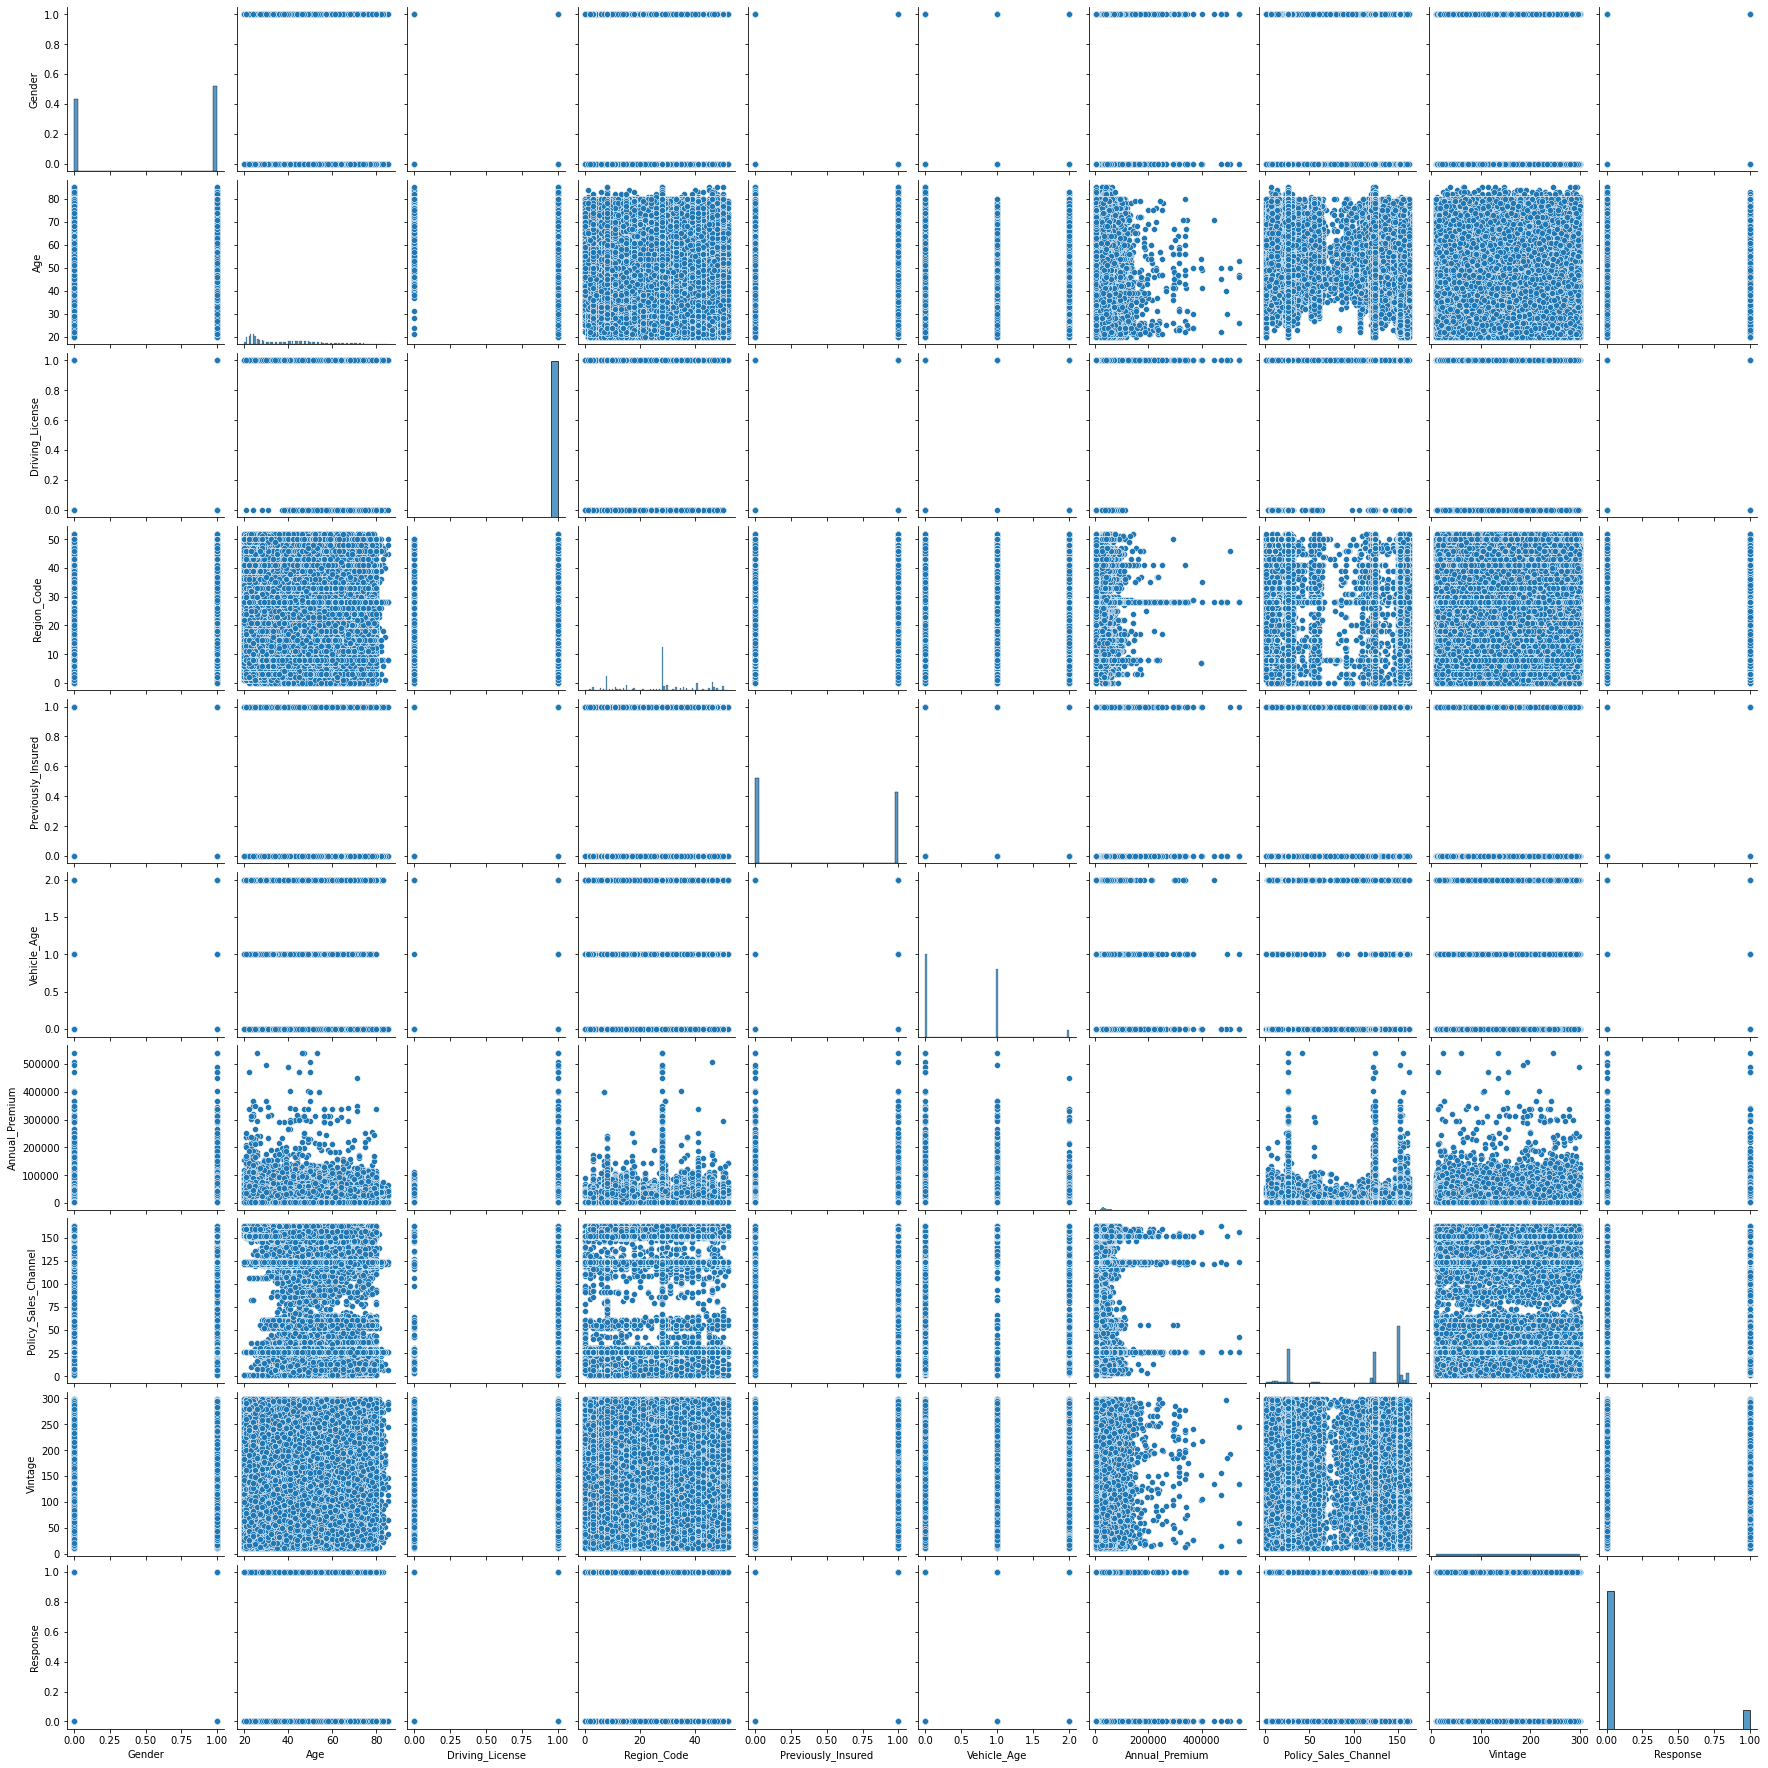

In [ ]:
import seaborn as sns
sns.pairplot(df_train)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df_train.drop(['Response'], axis=1), df_train['Response'])

KNeighborsClassifier()

missing y_test column, so must evaluate on train

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, r2_score
print(classification_report(df_train['Response'], knn.predict(df_train.drop(['Response'], axis=1))))
print(confusion_matrix(df_train['Response'], knn.predict(df_train.drop(['Response'], axis=1))))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73     46710
           1       0.72      0.76      0.74     46710

    accuracy                           0.73     93420
   macro avg       0.74      0.73      0.73     93420
weighted avg       0.74      0.73      0.73     93420

[[33000 13710]
 [11105 35605]]
-0.06251338043245558


In [10]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, min_samples_leaf=5)
forest.fit(df_train.drop(['Response'], axis=1), df_train['Response'])

RandomForestClassifier(min_samples_leaf=5)

In [11]:
print(classification_report(df_train['Response'], forest.predict(df_train.drop(['Response'], axis=1))))
print(confusion_matrix(df_train['Response'], forest.predict(df_train.drop(['Response'], axis=1))))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83     46710
           1       0.78      0.96      0.86     46710

    accuracy                           0.85     93420
   macro avg       0.87      0.85      0.85     93420
weighted avg       0.87      0.85      0.85     93420

[[34326 12384]
 [ 1808 44902]]
0.39233568828944554


Much better results with random forest on the training set, especially with the false negatives compared with the knn classifier. However this means nothing since i cant do this evaluation on the test set because the target column is missing.

In [12]:
!pip install tpot
from tpot import TPOTClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 6.7 MB/s 
     |████████████████████████████████| 193.6 MB 47 kB/s 
     |████████████████████████████████| 139 kB 66.6 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=e218eea405bcb9467fa24ea43c225ed60b884045510a0c675606bdcce17eaf5d
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [13]:
tpot_model = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [18]:
tpot_model.fit(df_train.drop(['Response'], axis=1), df_train['Response'])

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9935314315630421

Generation 2 - Current best internal CV score: 0.993595053788565


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(StandardScaler(input_matrix), bootstrap=False, criterion=entropy, max_features=0.45, min_samples_leaf=20, min_samples_split=19, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [19]:
print(classification_report(df_train['Response'], tpot_model.predict(df_train.drop(['Response'], axis=1))))
print(confusion_matrix(df_train['Response'], tpot_model.predict(df_train.drop(['Response'], axis=1))))
print(r2_score(df_train['Response'], tpot_model.predict(df_train.drop(['Response'], axis=1))))

              precision    recall  f1-score   support

           0       0.82      0.46      0.59       441
           1       0.99      1.00      1.00     46710

    accuracy                           0.99     47151
   macro avg       0.91      0.73      0.79     47151
weighted avg       0.99      0.99      0.99     47151

[[  202   239]
 [   43 46667]]
0.35450696656311853
